Practical 3.1: Hypothesis Testing
===============================

**Question 1.** I have two sets of trilobite fossils from different localities. I think they are from the same species but want some quantitative confirmation – on the basis of their mean length:width ratio (triloshape1.csv, triloshape2.csv) is there evidence that they are different?

In [2]:
%pylab inline

# Read in data
import numpy as np

# Read in the records.
record1 = np.recfromcsv("../data/triloshape1.csv") 
record2 = np.recfromcsv("../data/triloshape2.csv") 

print (record1.dtype.names)
print (record2.dtype.names)

Populating the interactive namespace from numpy and matplotlib
('082',)
('116',)


Well that's annoying! We were given a csv file with no header so recfromcsv has read the first line of data as the header. This underscores the importantance of always inspecting your data.

In [3]:
# Read in the records - take II.
record1 = np.recfromtxt("../data/triloshape1.csv") 
record2 = np.recfromtxt("../data/triloshape2.csv") 

triloshape1 = np.array(record1, dtype=float)
triloshape2 = np.array(record2, dtype=float)

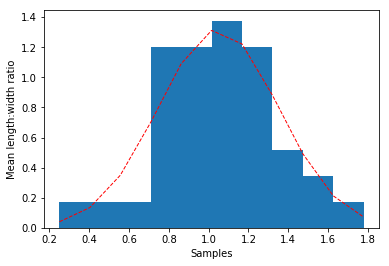

In [4]:
# Plot distribution - triloshape1
n, bins, patches = pylab.hist(triloshape1, 10, normed=1)

# Add a 'best fit' line
sigma = np.std(triloshape1)
mu = np.mean(triloshape1)

y = pylab.normpdf(bins, mu, sigma)
l = pylab.plot(bins, y, 'r--', linewidth=1)

pylab.xlabel("Samples")
pylab.ylabel("Mean length:width ratio")

pylab.show()


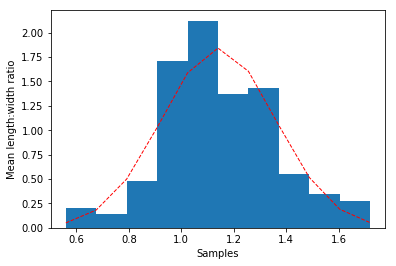

In [5]:
# Plot distribution - triloshape2
n, bins, patches = pylab.hist(triloshape2, 10, normed=1)

# Add a 'best fit' line
sigma = np.std(triloshape2)
mu = np.mean(triloshape2)

y = pylab.normpdf(bins, mu, sigma)
l = pylab.plot(bins, y, 'r--', linewidth=1)

pylab.xlabel("Samples")
pylab.ylabel("Mean length:width ratio")

pylab.show()

In [6]:
# The plots don't look convincing. However, it is always better to use a quantative test.
# Use the D’Agostino & Pearson test to test the null hypothesis that a samples come from
# a normal distribution.
from scipy import stats

k2_1, p_1 = stats.normaltest(triloshape1)
k2_2, p_2 = stats.normaltest(triloshape2)

print ("p-values = ", p_1, p_2)
if p_1 <= 0.05 or p_2 <= 0.05:
    print ("Reject the hypothesis that the sample comes from a normal distribution.")
else:
    print ("Accept the hypothesis that the sample comes from a normal distribution.")

p-values =  0.5253419681562425 0.5432794516844254
Accept the hypothesis that the sample comes from a normal distribution.


Now that we are confident that the two distributions come from a normal distribution we are confident that we should use the *T-test* to compare these datasets. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [7]:
t, p = stats.ttest_ind(triloshape1, triloshape2)

print ("T-test - (t, p) = %g, %g"%(t, p))
if p<=0.05:
    print ("Reject the hypothesis that the populations are the same."),
else:
    print ("Accept the hypothesis that the populations are the same.")



T-test - (t, p) = -2.09157, 0.0380368
Reject the hypothesis that the populations are the same.


**Question 2**. I have measured mica percentages in samples of igneous rocks from two different localities (micapercent1.csv, micapercent2.csv). The mean mica percentage is lower in the second locality and I have a geological theory that may explain this, but I first need to rule out the possibility that the lower mica content is just due to chance.

In [8]:
# Read in data
import numpy as np

# Read in the records.
record1 = np.recfromcsv("../data/micapercent1.csv") 
record2 = np.recfromcsv("../data/micapercent2.csv") 

print (record1.dtype.names)
print (record2.dtype.names)

('89',)
('62',)


As in the first question we were given a csv file with no header so recfromcsv has read the first line of data as the header. Always check your data!

In [9]:
# Read in the records - take II.
record1 = np.recfromtxt("../data/micapercent1.csv") 
record2 = np.recfromtxt("../data/micapercent2.csv") 

micapercent1 = np.array(record1, dtype=float)
micapercent2 = np.array(record2, dtype=float)

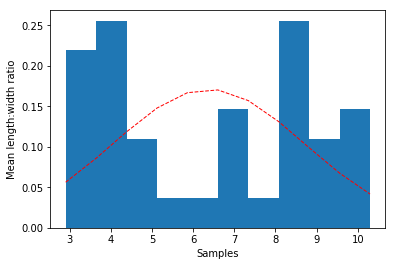

In [10]:
# Plot distribution - micapercent1
n, bins, patches = pylab.hist(micapercent1, 10, normed=1)

# Add a 'best fit' line
sigma = np.std(micapercent1)
mu = np.mean(micapercent1)

y = pylab.normpdf(bins, mu, sigma)
l = pylab.plot(bins, y, 'r--', linewidth=1)

pylab.xlabel("Samples")
pylab.ylabel("Mean length:width ratio")

pylab.show()

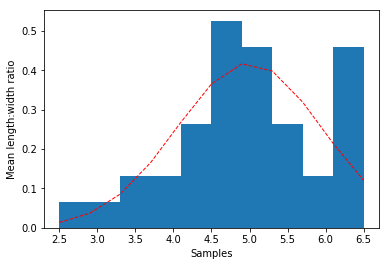

In [11]:
# Plot distribution - micapercent2
n, bins, patches = pylab.hist(micapercent2, 10, normed=1)

# Add a 'best fit' line
sigma = np.std(micapercent2)
mu = np.mean(micapercent2)

y = pylab.normpdf(bins, mu, sigma)
l = pylab.plot(bins, y, 'r--', linewidth=1)

pylab.xlabel("Samples")
pylab.ylabel("Mean length:width ratio")

pylab.show()

In [12]:
# Looking at the first of these two plots it would appear unlikely that the sample comes
# from a normal distribution. However, it is always better to use a quantative test.
# Use the D’Agostino & Pearson test to test the null hypothesis that a samples come from
# a normal distribution.
from scipy import stats

k2_1, p_1 = stats.normaltest(micapercent1)
k2_2, p_2 = stats.normaltest(micapercent2)

print ("p-values = ", p_1, p_2)
if p_1 <= 0.05 or p_2 <= 0.05:
    print ("Reject the hypothesis that the sample comes from a normal distribution.")
else:
    print ("Accept the hypothesis that the sample comes from a normal distribution.")

p-values =  3.19642639296486e-05 0.36414825539139845
Reject the hypothesis that the sample comes from a normal distribution.


In [14]:
u, p = stats.mannwhitneyu(micapercent1, micapercent2)

# This is a one-tailed test.

print ("Mann-Whitney rank test one-tailed p-value = ", p, " and u value = ", u)
if p<=0.05:
    print ("Reject the hypothesis that the populations are the same.")
else:
    print ("Accept the hypothesis that the populations are the same.")



Mann-Whitney rank test one-tailed p-value =  0.021983043515195907  and u value =  512.5
Reject the hypothesis that the populations are the same.


Therefore, the differences in the two samples really is significant and not by chance.